In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


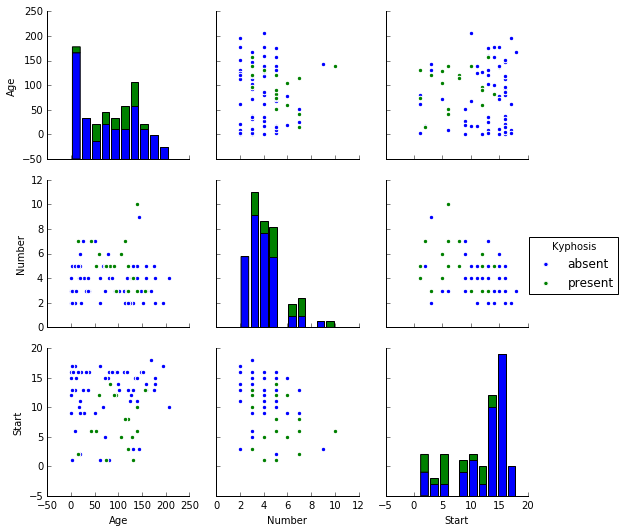

In [9]:
sns.pairplot(df, hue='Kyphosis')

In [10]:
from sklearn.cross_validation import train_test_split


In [13]:
x= df.drop('Kyphosis', axis=1)

In [14]:
y= df['Kyphosis']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [19]:
predictions = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[16  3]
 [ 4  2]]


             precision    recall  f1-score   support

     absent       0.80      0.84      0.82        19
    present       0.40      0.33      0.36         6

avg / total       0.70      0.72      0.71        25



In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(n_estimators=200)

In [25]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
rfc_pred = rfc.predict(X_test)

In [27]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[18  1]
 [ 5  1]]


             precision    recall  f1-score   support

     absent       0.78      0.95      0.86        19
    present       0.50      0.17      0.25         6

avg / total       0.71      0.76      0.71        25



## project

In [28]:
loans = pd.read_csv('loan_data.csv')

In [29]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [30]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


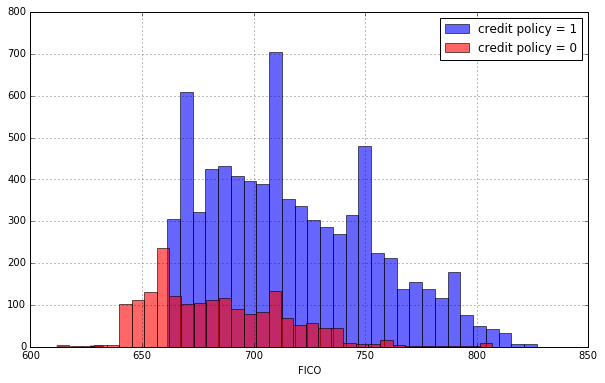

In [36]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=35,color='blue', label='credit policy = 1', alpha=0.6)
loans[loans['credit.policy']==0]['fico'].hist(bins=35,color='red', label='credit policy = 0', alpha=0.6)
plt.legend()
plt.xlabel('FICO')

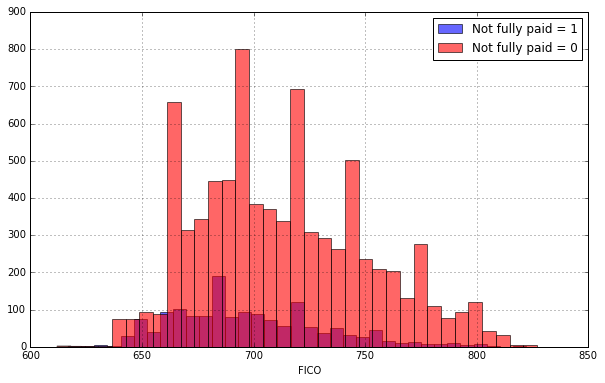

In [37]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35,color='blue', label='Not fully paid = 1', alpha=0.6)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35,color='red', label='Not fully paid = 0', alpha=0.6)
plt.legend()
plt.xlabel('FICO')

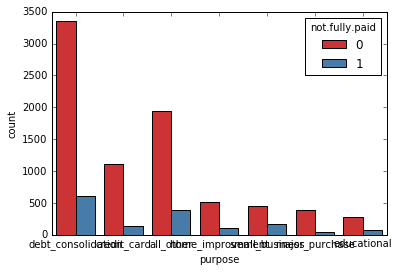

In [38]:
sns.countplot(x = 'purpose', hue='not.fully.paid',data = loans, palette='Set1')

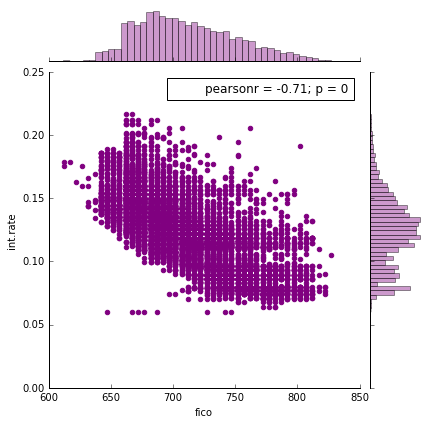

In [39]:
sns.jointplot(x='fico', y='int.rate',data=loans, color='purple')

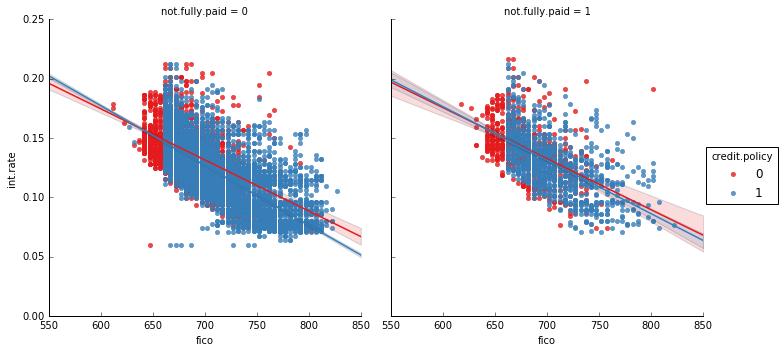

In [41]:
sns.lmplot(y='int.rate', x='fico', data=loans,hue='credit.policy', col='not.fully.paid', palette='Set1')

In [42]:
cat_feats = ['purpose']

In [43]:
final_data = pd.get_dummies(loans,columns=cat_feats, drop_first=True)

In [44]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null float64
purpose_debt_consolidation    9578 non-null float64
purpose_educational           9578 non-null float64
purpose_home_improvement      9578 non-null float64
purpose_major_purchase 

In [45]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [47]:
from sklearn.cross_validation import train_test_split

In [48]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtree = DecisionTreeClassifier()

In [52]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [53]:
predictions= dtree.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.82      0.83      2431
          1       0.18      0.22      0.20       443

avg / total       0.75      0.73      0.74      2874



In [56]:
print(confusion_matrix(y_test,predictions))

[[1990  441]
 [ 346   97]]


In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc = RandomForestClassifier(n_estimators=300)

In [59]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
predictions = rfc.predict(X_test)

In [61]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.53      0.02      0.04       443

avg / total       0.80      0.85      0.78      2874



In [62]:
print(confusion_matrix(y_test,predictions))

[[2422    9]
 [ 433   10]]
